
---

### 🎯 一、线性回归的基本公式

模型的预测公式为：

$$
\hat{y} = wx + b
$$

* $x$：输入特征
* $w$：权重
* $b$：偏置
* $\hat{y}$：模型预测值
* $y$：真实值

---

### 🎯 二、损失函数：均方误差（MSE）

$$
J(w, b) = \frac{1}{n} \sum_{i=1}^{n} (wx_i + b - y_i)^2
$$

目标是最小化这个损失函数，因此我们要对它求偏导数。

---

### 🧮 三、对权重 w 求导（梯度）

我们要计算：

$$
\frac{\partial J}{\partial w} = \frac{1}{n} \sum_{i=1}^{n} 2(wx_i + b - y_i) \cdot x_i
$$

把常数 2 提前，就得到：

$$
\frac{\partial J}{\partial w} = \frac{2}{n} \sum_{i=1}^{n} (wx_i + b - y_i) \cdot x_i
$$

也就是你代码里的这句：

```python
dw = (2 / len(x)) * np.dot(error, x)
```

其中：

* `error = y_pred - y`
* `np.dot(error, x)` 相当于求和 $\sum_i (wx_i + b - y_i) \cdot x_i$

---

### 🧮 四、对偏置 b 求导

对 b 求导更简单：

$$
\frac{\partial J}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} 2(wx_i + b - y_i)
$$

$$
= \frac{2}{n} \sum_{i=1}^{n} (wx_i + b - y_i)
$$

也就是你代码中的：

```python
db = (2 / len(x)) * np.sum(error)
```

---

### ✅ 五、结论

* 这两个导数（梯度）告诉我们当前参数 w 和 b 的方向偏离了最优解多少；
* 用它们可以进行**梯度下降**，逐步优化模型；
* 这种推导方式是机器学习中最基础的优化过程。

---

如果你想我推导更详细的中间步骤（带符号的推导过程），我可以继续展开。是否需要？


训练完成：w = 0.6177, b = 2.1361


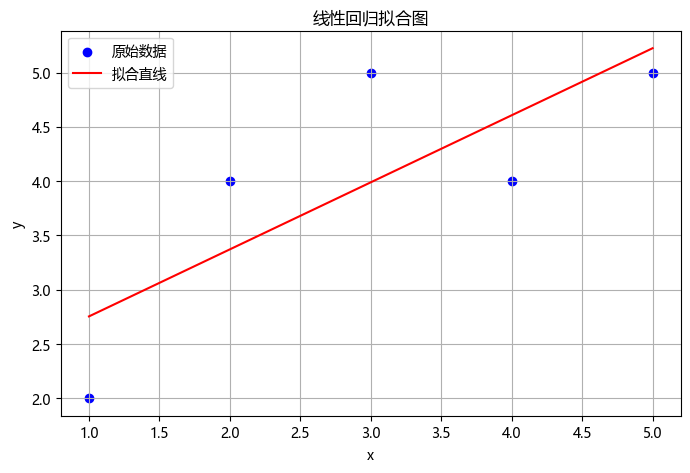

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", family='Microsoft YaHei')
# 构造数据
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# 初始化参数
w = 0.0
b = 0.0
lr = 0.01
epochs = 1000

# 梯度下降训练
for i in range(epochs):
    y_pred = w * x + b
    error = y_pred - y

    dw = (2 / len(x)) * np.dot(error, x)
    db = (2 / len(x)) * np.sum(error)

    w -= lr * dw
    b -= lr * db

# 打印最终模型参数
print(f"训练完成：w = {w:.4f}, b = {b:.4f}")

# 可视化结果
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='原始数据')
plt.plot(x, w * x + b, color='red', label='拟合直线')
plt.title('线性回归拟合图')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
